# Gözetimsiz Öğrenme

Makine öğrenmesi modellerinde, bağımlı değişken elimizde olmadığı durumlarda, gözlem birimlerinin bir şekilde anlamlı hale getirilmesi çabasıdır.

# K-Means 

## Teori

* Amaç gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmaktır.
* K-Means algoritması hiyerarşik olmayan bir algoritmadır.

![image.png](image_01.png)

İyi bir K-Means çıktısında; kümeler içi benzerlik yüksek, kümeler dışı benzerlik düşük olmalıdır.

k sayısının ne olacağı konusunda karar vermek önemli bir adım çünkü k değiştiğinde hatalar da değişir.    

### Model

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [2]:
df_arrest = pd.read_csv("USArrests.csv")

In [3]:
df = df_arrest

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.index = df.iloc[:, 0]

In [6]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [7]:
df = df.iloc[:, 1:5]

In [8]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [9]:
df.index.name = None

In [10]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [11]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


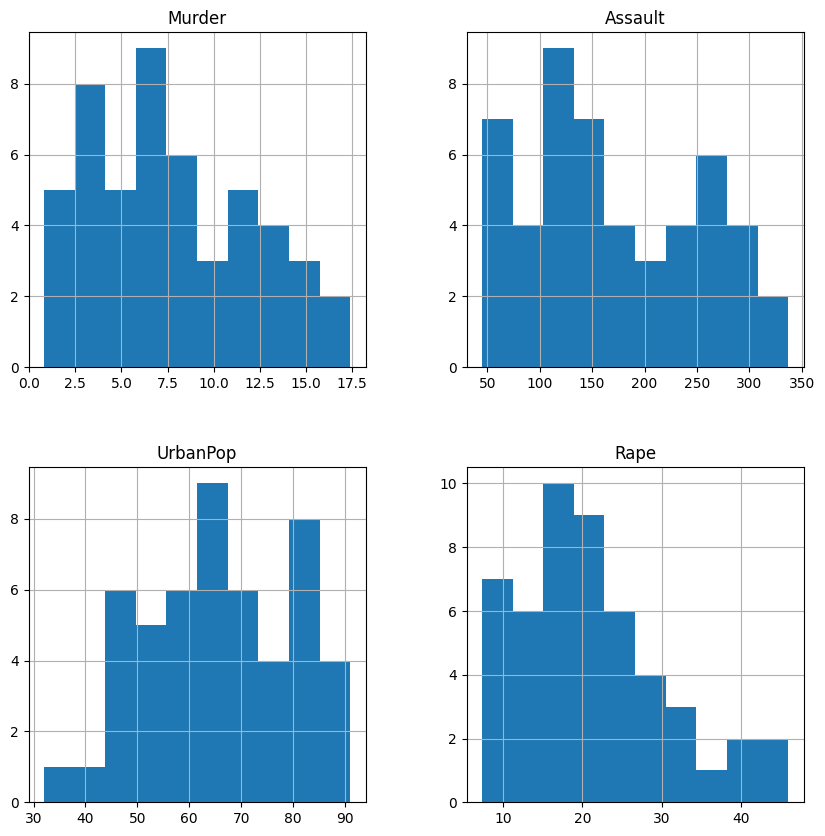

In [14]:
df.hist(figsize=(10, 10));

In [15]:
kmeans = KMeans(n_clusters=4)
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [16]:
k_fit = kmeans.fit(df)

In [17]:
k_fit.n_clusters

4

## n_clusters parametresini verirsek n sayıda küme oluşur fakat elbow ile optimum küme sayısını bulduktan sonra n'i vermeliyiz.

In [18]:
k_fit.cluster_centers_

array([[ 12.38      , 246.6       ,  67.2       ,  27.78      ],
       [  4.27      ,  87.55      ,  59.75      ,  14.39      ],
       [  7.50769231, 170.38461538,  71.46153846,  22.61538462],
       [ 11.8       , 300.85714286,  68.71428571,  28.85714286]])

In [19]:
k_fit.labels_

array([0, 0, 3, 2, 3, 2, 1, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 3, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 3, 0, 3, 1, 1, 2, 2, 1, 2, 3, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2], dtype=int32)

In [20]:
kmeans = KMeans(n_clusters=2)
k_fit = kmeans.fit(df)

In [21]:
kumeler = k_fit.labels_

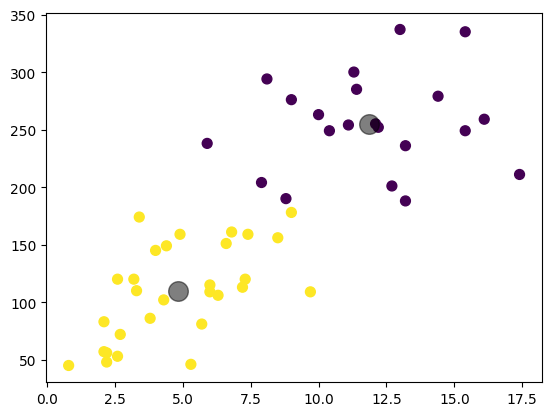

In [22]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kumeler, s=50, cmap="viridis");
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:, 0], merkezler[:, 1], c="black", s=200, alpha=0.5)

K-Means sonucu oluşan segmentleri görselleştirmenin 2 yolu var:

1) İki değişken seçip scatterplot yapmak
2) PCA ile boyut indirgemesi yapıp görselleştirme yapmak

In [23]:
# kumeler ve gozlem birimleri

In [24]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
kumeler

array([1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [27]:
pd.DataFrame({"Eyaletler": df.index, "Kümeler": kumeler})[0:10]

,Eyaletler,Kümeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1
5,Colorado,0
6,Connecticut,2
7,Delaware,1
8,Florida,1
9,Georgia,0


## Optimum küme sayısının belirlenmesi

Gözetimli öğrenmede model tuning vs kullanırken, k means te elbow yöntemi ile optimum küme sayısını buluyoruz.

K-means elbow yöntemi, k-means kümeleme algoritmasında en uygun küme sayısını belirlemek için kullanılan bir yöntemdir, burada veri noktalarının kümelere göre değişen toplam hata kareleri toplamı (SSE) değerlerinin grafiği çizilir ve en büyük eğim değişimi (dirsek noktası) gösteren nokta en uygun küme sayısı olarak seçilir.

In [29]:
#!pip install yellowbrick

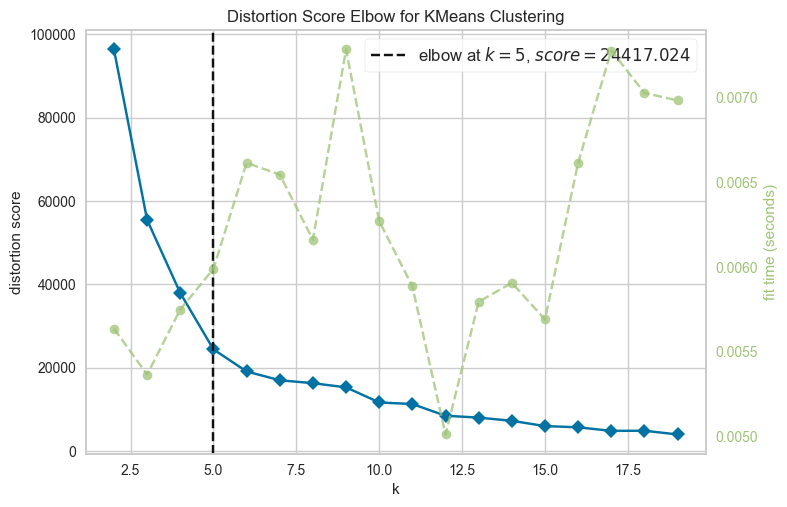

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 20))
visualizer.fit(df)
visualizer.poof()

1) Y ekseni (distortion score / inertia): Küme içi uzaklıkların toplamını (her noktanın, ait olduğu kümenin merkezine olan uzaklığı) gösteriyor. Küçük değer = kümeler daha sıkı ve homojen.
2) Mavi çizgi: Küme sayısı arttıkça distortion (hata) azalıyor, çünkü daha fazla küme = veriler daha iyi ayrılıyor.
3) Dirsek noktası: Eğrinin keskin şekilde kırıldığı nokta. Burada “elbow at k = 5” olarak işaretlenmiş. Yani 5 küme seçmek uygun, çünkü bundan sonra kümeyi artırmak distortion’u çok az düşürüyor (kazanç azalıyor).
4) Yeşil çizgi (sağ eksen): Distortion skorunun türevine benzer ek bir ölçüm (maliyet azalım oranı). Dirsek noktasını destekleyici olarak gösterilmiş.

İş birimine göre segmentasyon yapmalıyız. Segment sayıları çoğu zaman 20 segment olmaz, 2 olur, 5 olur...

In [32]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
kumeler

array([1, 1, 4, 2, 4, 2, 3, 1, 4, 1, 0, 3, 1, 3, 0, 3, 3, 1, 0, 4, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 4, 1, 4, 0, 3, 2, 2, 3, 2, 4, 0, 2, 2, 3,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [33]:
pd.DataFrame({"Eyaletler": df.index, "Kümeler": kumeler})[0:10]

,Eyaletler,Kümeler
0,Alabama,1
1,Alaska,1
2,Arizona,4
3,Arkansas,2
4,California,4
5,Colorado,2
6,Connecticut,3
7,Delaware,1
8,Florida,4
9,Georgia,1
